## CHAPTER 8 차원 축소
- 많은 경우 머신러닝 문제는 훈련 샘플 각각이 추천 심지어 수백만 개의 특성을 가지고 있다.
- 이는 훈련을 느리게 할 뿐만 아니라, 아프로 보게 되겠지만 좋은 솔루션을 찾기 어렵게 만든다.
> - 실전문제에서는 특성 수를 크게 줄여서 불가능한 문제를 가능한 범위로 변경할 수 있는 경우가 많다.
- 차원을 축소시키면 일부 정보가 유실됩니다. 그래서 훈련 속도가 빨라질 수는 있지만 시스템의 성능이 조금 나빠질 수 있다.
> - 그러므로 차원 축소를 고려하기 전에 훈련이 너무 느린지 먼저 원본 데이터로 훈련시켜 봐야 한다.
> - 어떤 경우에는 훈련 데이터의 차원을 축소 시키면 잡음이나 불필요한 세부사항을 걸러내므로 성능을 높일 수 있다.(일반적으로는 훈련 속도만 빨라진다.)
- 훈련 속도를 높이는 것 외에 차원 축소는 데이터 시각화에도 아주 유용하다.
> - 차원 수를 둘로(또는 셋) 줄이면 고차원 훈련 세트를 하나의 그래프로 그릴 수 있고 군집 같은 시각적인 패턴을 감지해 중요한 통찰을 얻는 경우가 많다.

## 8.1 차원의 저주
- 우리는 3차원의 세계에 살고 있어서 고차원 공간을 직관적으로 이해하기 어렵다. 
> - 1,000 차원의 공간에서 200차원의 타원체는 고사하고 기본적인 4차원 초입방체조차 머릿속에 그리기 힘들다
> - 고차원의 데이터셋 일수록 대부분의 훈련 데이터가 서로 멀리 떨어져있다. 따라서 고차원에서 훈련을 시킬수록 데이터들을 더 잘 예측(혹은 분류) 할 수 있지만 그 만큼 데이터의 과적합 오버피팅이 쉽게 일어나는 것 이다.
- 이론적으로 차원의 저주를 해결하는 해결책 하나는 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우는 것이지만 불행하게도 특성의 수가 100개만 되더라도 훈련 샘플을 서로 0.1 이내에 위치시키려면 관측 가능한 우주에 있는 원자 수 모두를 합친 것 보다 많은 훈련 샘플을 모아야한다.

## 8.2 투영
- 대부분의 실전문제는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않다.
- 많은 특성은 거의 변화가 없는 반면, 다른 특성들은 서로 강하게 연관되어 있다.
> - 결과적으로 모든 훈련 샘플이 사실 고차원 공간 안의 저차원 부분 공간에 놓여 있다.

![test](./img/3차차원.png)

- 모든 훈련 샘플이 거의 평면 형태로 놓여 있는데 이것이 고차원(3D)공간에 있는 저차원 (2D)의 부분 공간이다.

![test](./img/투영.png)

- 이 부분 공간에 수직으로(즉, 샘플과 평면 사이의 가장 짧은 직선을 따라) 투영하면 2D 데이터셋을 얻는다. 즉, 차원을 3D -> 2D로 줄여진다.
> - 그러나 차원 축소에 있어서 투영이 언제나 최선의 방법은 아니다.

![TEST](./img/스위스롤.png)

![TEST](./img/스위스롤2.png)

- 스위스 롤의 경우 그냥 평면에 투영시키면 스위스 롤의 층이 서로 뭉개진다.
- 우리가 원하는 것은 스위스 롤을 펼쳐서 오른쪽처럼 2D 데이터셋을 얻는 것 이다.

## 8.3 매니폴드 학습
- 2D 매니폴드는 고차원 공간에서 휘어지거나 뒤틀린 2D 모양이다.
> - __d차원 매니폴드는 국부적으로 d차원 초평면으로 보일 수 있는 n차원 공간의 일부이다.(d<n)__
>> - 스위스 롤의 경우에는 d=2이고 n=3 이다.
> - 국부적으로는 2D 평면으로 보이지만 3차원으로 말려 있다.
- 많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동한다. 이를 매니폴드 학습이라 한다.
> - 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 매니폴드 가정 또는 매니폴드 가설에 근거한다. 
>> - MNIST를 예로 들면 숫자 이미지를 만들 때 가능한 자유도는 아무 이미지나 생성할 때의 자유도보다 훨씬 낮다.
- 매니폴드의 가정은 종종 암묵적으로 다른 가정과 병행되곤 하는데 바로 처리해야 할 작업(예를들면 분류나 회귀)이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것이란 가정이다.
![TEST](./img/스위스롤4.png)
- 첫 번째 행에서는 스위스 롤이 두 개의 클래스로 나뉘어 있다.
> - 첫 번째 행의 오른쪽은 결정 경계가 매우 복잡하지만 펼쳐진 매니폴드 공간인 2D(2행의 오른쪽)에서는 결정 경계가 단순히 직선이다.
- 이런 가정은 항상 유효하지는 않는데 첫 번째 행의 왼쪽은 3D공간에서는 매우 단순하지만 펼쳐진 매니폴드에서는 결정 경계가 더 복잡해졌다.
- 즉, 모델을 훈련시키기 전에 훈련 세트의 차원을 감소시키면 훈련 속도는 빨라지지만 항상 더 낫거나 간단한 솔루션이 되는 것은 아니다. 이는 전적으로 데이터셋에 달렸습니다.

## 8.4 PCA
- 주성분 분석(PCA)은 가장 인기 있는 차원 축소 알고리즘이다.
- 먼저 데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영시킨다.
![TEST](./img/PCA1.png)
- 왼쪽 그래프는 간단한 2D 데이터셋이 세 개의 축 (즉, 일차원 초평면)과 함께 표현되어 있다.
- 오른쪽 그래프는 데이터셋이 각 축에  투영된 결과
> - 실선에 투영된 것은 분산을 최대로 보존하는 반면, 점선에 투영된 것은 분산을 매우 적게 유지하고 있다
> - 가운데의 파선에 투영된 것은 분산을 중간 정도로 유지하고 있다.
- 다른 방향으로 투영하는 것보다 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적으로 보입니다.
> - 이 선택을 다른 방식으로 설명하면 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화 하는 축이다.

## 8.5 주성분
- PCA는 훈련 세트에서 분산이 최대인 축을 찾는다. 위 그림에선 실선을 뜻함
- 그리고 첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축을 찾는다. 즉, 점선이다.
> - 고차원의 데이터셋이라면 PCA는 이전의 두 축에 직교하는 세 번째 축을 찾으며 데이터셋에 있는 차원 수만큼 네 번째 다섯 번째, 축을 찾는다.
- i번째 축을 정의하는 단위 벡터를 i번째 주성분(PC)라 부른다.
> - 위 그림에선 1번째 PC는 c1이고 2번째 PC는 c2이다.
> - 주성분의 방향은 일정치 않지만 일반적으로 같은 축에 놓여 있을 것이다.
- 훈련 세트의 주성분은 특잇값 분해(SVD)라는 표준 행렬 분해 기술이 있어서 훈련 세트 행렬 X를 세 개 행렬의 점곱인 U,Σ,V^T(transpose)로 분해 할 수 있다.

In [1]:
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

boston = load_boston()

X_train, y_train = boston['data'], boston['target']
# train data 와 test data를 분류 
# train 0 ~ 59,999개 test 60,000 ~ 70,000

In [3]:
X_centered = X_train - X_train.mean(axis = 0)
U, s,Vt = np.linalg.svd(X_centered) # svd() 훈련 세트의 모든 주성분을 구한 후 처음 두 개의 PC를 추출

In [4]:
c1 = Vt.T[:,0] # 첫번째 PC
c2 = Vt.T[:,1] # 두번째 PC

In [5]:
print(c1)

[ 2.90793419e-02 -4.35901380e-02  2.83311855e-02 -5.55834285e-05
  4.49723983e-04 -1.16817521e-03  8.36340851e-02 -6.56167701e-03
  4.50056441e-02  9.49748862e-01  5.60015636e-03 -2.91215007e-01
  2.29433981e-02]


- PCA는 데이터셋의 평균이 0이라고 가정한다.
- 사이킷런은 이 작업을 대신 처리해주지만 PCA를 직접 구현하는 경우 먼저 데이터의 원점을 맞추는 것을 잊어선 안 된다.

## 8.6 d차원으로 투영하기
- 주성분을 모두 추출해냈다면 처음 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소 시킬 수 있다.
> - 이 초평면은 분산을 가능한 한 최대로 보존하는 투영임을 보장한다.
> - 맨 처음 그림을 보면 3D 데이터셋은 데이터셋의 분산이 가장 큰 첫 두 개의 주성분으로 구성된 2D 평면에 투영되었다. 그 결과를 보면 이 2D투영은 원본 3D 데이터셋과 매우 비슷하다.
- 초평면에 훈련 세트를 투영하기 위해서는 행렬 X와 첫 d개의 주성분을 담은 행렬 W(d)를 점곱하면 된다.

In [6]:
W2 = Vt.T[:,:2] # 첫 두개의 주성분을 담은 행렬
X2D = X_centered.dot(W2) # 행렬 X * W(d)

In [7]:
X2D

array([[-119.81821283,    5.56072403],
       [-168.88993091,  -10.11419701],
       [-169.31150637,  -14.07855395],
       ...,
       [-138.38670003,   -0.93685923],
       [-137.50473395,   -4.25059832],
       [-139.18987217,   -1.00782973]])

- 지금까지 분산을 가능한 한 최대로 유지하면서 어떻게 데이터셋의 차원을 특정 차원으로 축소하는지를 보았다.

In [8]:
from sklearn.decomposition import PCA 
# SVD 분해 방법을 사용
# 사이킷런의 PCA모델은 자동으로 데이터 중앙에 맞춘다.

In [9]:
pca = PCA(n_components=2) # 2차원으로
X2D = pca.fit_transform(X_train)

In [10]:
X2D

array([[-119.81821283,   -5.56072403],
       [-168.88993091,   10.11419701],
       [-169.31150637,   14.07855395],
       ...,
       [-138.38670003,    0.93685923],
       [-137.50473395,    4.25059832],
       [-139.18987217,    1.00782973]])

- PCA 변환기를 데이터셋에 학습시키고 나면 components_ 변수를 사용해 주성분을 확인 할 수 있다.
> - 이 변수에는 주성분이 행 벡터로 포함되어 있으므로 첫 번째 주성분은 pca.components_.T[:,0]이 된다.

In [11]:
pca.explained_variance_ratio_

array([0.80581464, 0.16305085])

- explained_variance_ratio_ 변수에 저장된 주성분의 설명된 분산의 비율도 유용한 정보 중 하나이다.
- 위 코드에서 보면 첫 번째 PC의 설명된 분산의 비율이 전체의 분산 중 약 80%를 포함하고 두 번째 PC의 설명된 분산의 비율은 약 16%이다. 즉 제1,2 주성분은 전체 분산의 비율 중 약 96.8%를 차지한다. 

## 적절한 차원 수 선택
- 축소할 차원 수를 임의로 정하기보다는 충분한 분산 (예를들면 95%)이 될 때까지 더해야 할 차원수를 선택하는 쪽을 더 선호한다.
>- 물론 데이터 시각화를 위해 차원을 축소하는 경우에는 차원을 2개나 3개로 줄이는 것이 일반적이다.

In [12]:
pca = PCA()
pca.fit(X_train) # train set 훈련
cumsum = np.cumsum(pca.explained_variance_ratio_) # 누적PC들을 나열 (제1주성분, 제2주성분)
d = np.argmax(cumsum >= 0.95) + 1 
# 설명된 분산이 0.95이상인 경우의 인덱스를 추출하고 +1 하여 반환
# +1 인덱스의 시작이 0이기 때문

In [13]:
cumsum # 제 2 주성분(PC) 까지

array([0.80581464, 0.9688655 , 0.99021419, 0.99717114, 0.99847901,
       0.99920675, 0.99962677, 0.9998755 , 0.99996089, 0.9999917 ,
       0.99999835, 0.99999992, 1.        ])

In [14]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

- 또 다른 방법은 설명된 분산을 차원 수에 대한 함수로 그리는 것이다. (그냥 cumsum을 그래프로 그리면 된다.)
> - 일반적으로 이 그래프에는 설명된 분산의 빠른 성장이 멈추는 변곡점이 있다.

## 8.6 압축을 위한 PCA
- 차원을 축소하고 난 후에는 훈련 세트의 크기가 줄어든다.
- 대부분의 분산은 유지되었지만 데이터셋은 원본 특성 13 -> 2개로 줄어들었다. 이는 상당한 압축률이고 SVM 같은 분류 알고리즘의 속도를 크게 높일 수 있다.
- 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 원래의 차원으로 되돌릴 수도 있지만 유실된 분산은 얻을 수 없다. 하지만 원본 데이터와 매우 비슷 할 것이다.
> - 이렇게 원본 데이터와 재구성된 데이터(압축 후 복원) 사이의 평균 제곱 거리를 재구성 오차라고 한다.

In [15]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [16]:
X_train.shape

(506, 13)

In [17]:
X_reduced.shape

(506, 2)

In [18]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [19]:
X_reduced.shape

(506, 2)

In [20]:
X_recovered.shape

(506, 13)

## 8.7 점진적 PCA
- PCA 구현의 문제는 SVD 알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다는 점이다.
- 점진적 PCA(IPCA)는 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입한다.
> - 이런 방식은 데이터가 클 때 유용하고 온라인 학습으로 실시간으로 적용할 수 있다.

In [21]:
from sklearn.decomposition import IncrementalPCA # IPCA

In [22]:
n_batchs = 100 # batch_size
inc_pca = IncrementalPCA(n_components=2) # 2개의 주성분 
for X_batch in np.array_split(X_train,n_batchs): # X_train 데이터를 100개의 미니배치로 나눔
    inc_pca.partial_fit(X_batch) 
    # 배치 한 개씩 훈련을 진행 (미니배치마다 호출)
    # 훈련 세트 전체를 사용하는 fit() 메서드가 아닌 partial_fit() 메서드를 미니배치마다 호출

X_reduced = inc_pca.transform(X_train) # 훈련 데이터를 변환

In [23]:
X_reduced

array([[-119.80439446,    5.54338783],
       [-168.80046442,  -10.53391261],
       [-169.26988466,  -14.3216913 ],
       ...,
       [-138.27363657,   -1.44332242],
       [-137.39661592,   -4.74017556],
       [-139.10205908,   -1.41907512]])

## 8.8 랜덤 PCA
- 이 방식은 확률적인 알고리즘으로, 첫 d개의 주성분에 대한 근삿값을 빠르게 찾는다.
> - d가 n 보다 많이 작으면 앞선 알고리즘보다 매우 빨라진다. 여기서 n은 데이터의 수

In [24]:
rnd_pca = PCA(n_components=2, svd_solver="randomized") # 랜덤 PCA
X_reduced = rnd_pca.fit_transform(X_train) # 속도가 빨라짐

## 8.9 커널 PCA (KPCA)
- 고차원 특성 공간에서의 선형 결정 경계는 원본 공간에서는 복잡한 비선형 결정 경계에 해당
- 같은 기법을 PCA에 적용해 복잡한 비선형 투영으로의 차원 축소를 가능하게 할 수 있다.
- KPCA는 비지도 학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다.
> - 이 기법은 투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때도 유용하다.
> - 차원 축소는 종종 지도 학습의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.

In [29]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [25]:
from sklearn.decomposition import KernelPCA
import numpy as np

In [26]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [27]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf',gamma=0.04)
X_reduced = rbf_pca.fit_transform(X_train)

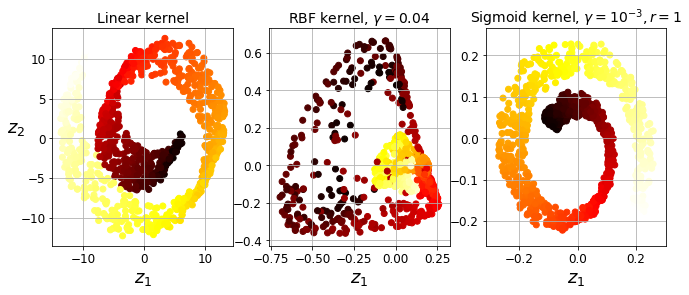

In [30]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()


## 8.9.1 커널 선택과 하이퍼파라미터 튜닝
- kPCA는 비지도 학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능측정 기준이 없다. 
- 하지만 차원 축소는 종종 지도 학습의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택 할 수 있다.
> - 아래의 코드는 두 간계의 파이프라인으로 먼저 kPCA를 사용해 차원을 2차원으로 축소하고 분류를 위해 로지스틱 회귀를 적용한다. 그런 다음 파이프라인 마지막 단계에서 가장 높은 분류 정확도를 얻기 위해 그리드서치를 사용해 kPCA의 가장 좋은 커널과 gamma 파라미터를 찾는다.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [32]:
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="liblinear"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
print(grid_search.best_params_) # 가장 좋은 커널과 하이퍼파라미터는 best_params_ 변수에 저장

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


- 완전한 비지도 학습 방법으로, 가장 낮은 재구성 오차를 만드는 커널과 하이퍼파라미터를 선택하는 방식도 있다
> - 하지만 재구성은 선형 PCA만큼 쉽지 않다.

![test](./img/커널2.jpg)

- 커널 트릭 덕분에 훈련 세트를 특성 맵을 사용한 무한 차원의 특성 공간(오른쪽 아래)에 매핑한 다음, 변환된 데이터셋을 선형 PCA를 사용해 2D로 투영한 것과 수학적으로 수학적으로 동일하다.
- 축소된 공간에 있는 샘플에 대해 선형 PCA를 역전시키면 재구성된 데이터 포인트는 원본 공간이 아닌 특성 공간에 놓이기 된다. (오른쪽 위 사진 그림에서 X로 표현) 이 특성 공간은 무한 차원이기 때문에 재구성된 포인트를 계산할 수 없고 재구성에 따른 실제 에러를 계산할 수 없다.
- 다행히 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있다. 이를 __재구성 원상__이라 한다.
- 원상을 얻게 되면 원본 샘플과의 제곱 거리를 측정할 수 있다.
- 재구성의 한 가지 방법은 투영된 샘플을 훈련 세트로 원본 샘플을 타깃으로 하는 지도 학습 회귀 모델을 훈련시키는 것이다.

In [36]:
rbf_cpa = KernelPCA(n_components=2,kernel='rbf',gamma=0.0433,
                   fit_inverse_transform = True) # 재구성
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

- KernelPCA는 fit_inverse_transform=False가 기본값이며 inverse_transform 메서드를 가지고 있지 않다. True로 지정했을때만 생성

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(X,X_preimage)

32.78630879576612

- 이렇게 되면 재구성 원상 오차를 최소화하는 커널과 하이퍼파라미터를 찾기 위해 교차 검증으로 그리드 탐색을 할 수 있다.

## 8.10 LLE
- 지역 선형 임베딩(LLE)은 또 다른 강력한 비선형 차원 축소 기술이다. 
- 이전 알고리즘처럼 투영에 의존하지 않는 매니폴드 학습이다.
- 간단히 말해 LLE는 먼저 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정한다.
- 그 다음 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다.
- 이는 특히 잡음이 너무 많지 않은 경우 꼬인 매니폴드를 펼치는 데 잘 작동한다.

In [39]:
from sklearn.manifold import LocallyLinearEmbedding

In [40]:
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10) # 2차원 , 10개의 샘플
X_reduced = lle.fit_transform(X)

![test](./img/스위스.png)

- 지역 선형 임베딩을 사용해 스위스 롤을 펼친다.
- 위 그림과 같이 스위스 롤이 완전히 펼쳐졌고 지역적으로 샘플 간 거리가 잘 보존되어 있다.
- 그러나 크게 보면 샘플 간 거리가 잘 유지되어 있지 않다.
> - 펼쳐진 스위스 롤의 오른쪽은 압축되어 있고 왼쪽은 확장되어 있다.
> - 그럼에도 불구하고 LLE는 매니폴드를 모델링하는 데 잘 동작한다.
- LLE의 작동 방식
> - 먼저 알고리즘이 각 훈련 샘플 X에 대해 가장 가까운 k개의 샘플을 찾는다.
> - 그런 다음 이 이웃에 대한 선형 함수로 x를 재구성한다. 더 구체적으로 말하면 x(i)와 w(i,j)x(j)사이의 제곱 거리가 최소가 되는 w를 찾는다. 
> - 여기서 x(j), x(i)의 가장 가까운 K개 이웃 중 하나가 아닐 경우에는 W(i,j) = 0이 된다.
> - 그러므로 첫 단계는 아래 식과 같은 제한이 있는 최적화 문제가 된다.
> - 여기서 W는 가중치W(i,j)를 모두 담고 있는 가중치 행렬이다.
> - 두번째 제약은 각 훈련 샘플 x(i)에 대한 가중치를 단순히 정규화 하는 것이다.

![test](./img/LLE.png)

> - 조건: W(i,j) = 0 X(j)가 X(i)의 최근접 이웃 k개 중 하나가 아닐때
> - 조건: ΣW(i,j) = 1 , i = 1,2,3,..,m 일때

- 이 단계를 거치면 가중치 행렬 W^은 훈련 샘플 사이에 있는 지역 선형 관계를 담고 있다. 
- 두 번째 단계는 가능한 이 관계가 보존되도록 훈련 샘플을 d차원 공간 (d<n)으로 매핑한다.
- 만약 z(i)가 d차원 공간에서 x(i)의 상(image)라면 가능한 z(i)와 Σw^(i,j)z(i) 사이의 거리가 최소화 되어야한다.
- 이 아이디어는 아래 식과 같은 제약이 없는 최적화 문제로 바꾸어준다. 
- 첫번째 단계와 비슷해 보이지만, 샘플을 고정하고 최적의 가중치를 찾는 대신, 반대로 가중치를 고정하고 저차원의 공간에서 샘플 이미지의 최적 위치를 찾는다. Z는 모든 z(i)를 포함하는 행렬이다.

- Z = argminΣ(z(i) - Σw^(i,j))^2